# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [2]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_exc import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Read MNIST data:
You can download the data from [here](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


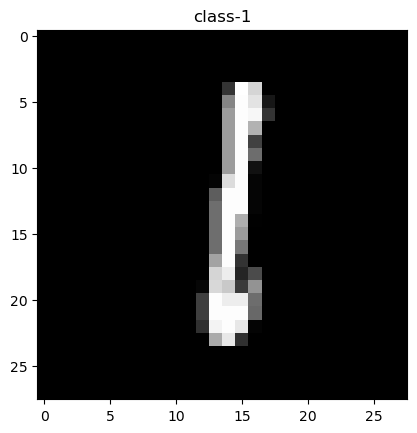

In [5]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'mnist/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# CROSS-CHECK: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [6]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [9]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 2.189726: 100%|█| 300/300 [00:05<00:00, 58.83it/s]


epoch: 1 / (30), loss: 2.263358, train acc: 19.28, val acc: 19.32
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 2.015488: 100%|█| 300/300 [00:05<00:00, 58.57it/s]


epoch: 2 / (30), loss: 2.101296, train acc: 39.70, val acc: 39.94
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.914310: 100%|█| 300/300 [00:05<00:00, 55.87it/s]


epoch: 3 / (30), loss: 1.941924, train acc: 56.12, val acc: 56.11
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.752513: 100%|█| 300/300 [00:05<00:00, 55.33it/s]


epoch: 4 / (30), loss: 1.801719, train acc: 61.83, val acc: 61.48
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.630458: 100%|█| 300/300 [00:05<00:00, 55.80it/s]


epoch: 5 / (30), loss: 1.676950, train acc: 67.97, val acc: 67.68
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.496110: 100%|█| 300/300 [00:05<00:00, 56.56it/s]


epoch: 6 / (30), loss: 1.565105, train acc: 75.38, val acc: 74.50
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.409202: 100%|█| 300/300 [00:05<00:00, 55.37it/s]


epoch: 7 / (30), loss: 1.464724, train acc: 78.58, val acc: 77.78
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.414394: 100%|█| 300/300 [00:05<00:00, 54.63it/s]


epoch: 8 / (30), loss: 1.373083, train acc: 82.71, val acc: 82.25
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.248030: 100%|█| 300/300 [00:05<00:00, 52.38it/s]


epoch: 9 / (30), loss: 1.290346, train acc: 84.08, val acc: 83.86
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.159519: 100%|█| 300/300 [00:06<00:00, 47.85it/s]


epoch: 10 / (30), loss: 1.215471, train acc: 85.69, val acc: 85.46
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.140864: 100%|█| 300/300 [00:06<00:00, 48.05it/s]


epoch: 11 / (30), loss: 1.147914, train acc: 87.02, val acc: 86.60
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.044304: 100%|█| 300/300 [00:05<00:00, 50.88it/s]


epoch: 12 / (30), loss: 1.086780, train acc: 88.20, val acc: 88.06
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.011704: 100%|█| 300/300 [00:07<00:00, 40.46it/s]


epoch: 13 / (30), loss: 1.031021, train acc: 88.85, val acc: 88.75
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.917084: 100%|█| 300/300 [00:07<00:00, 41.28it/s]


epoch: 14 / (30), loss: 0.980309, train acc: 89.43, val acc: 89.35
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.889093: 100%|█| 300/300 [00:07<00:00, 41.02it/s]


epoch: 15 / (30), loss: 0.934176, train acc: 89.79, val acc: 89.78
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.853387: 100%|█| 300/300 [00:07<00:00, 41.14it/s]


epoch: 16 / (30), loss: 0.891497, train acc: 89.94, val acc: 89.83
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.830915: 100%|█| 300/300 [00:07<00:00, 41.14it/s]


epoch: 17 / (30), loss: 0.852622, train acc: 90.59, val acc: 90.70
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.786036: 100%|█| 300/300 [00:07<00:00, 41.14it/s]


epoch: 18 / (30), loss: 0.817123, train acc: 90.86, val acc: 91.00
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.799263: 100%|█| 300/300 [00:07<00:00, 40.01it/s]


epoch: 19 / (30), loss: 0.784217, train acc: 91.05, val acc: 91.33
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.690564: 100%|█| 300/300 [00:07<00:00, 39.85it/s]


epoch: 20 / (30), loss: 0.754408, train acc: 91.12, val acc: 91.33
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.707909: 100%|█| 300/300 [00:07<00:00, 41.14it/s]


epoch: 21 / (30), loss: 0.726913, train acc: 91.41, val acc: 91.38
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.691833: 100%|█| 300/300 [00:07<00:00, 40.65it/s]


epoch: 22 / (30), loss: 0.701169, train acc: 91.33, val acc: 91.58
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.610113: 100%|█| 300/300 [00:07<00:00, 40.98it/s]


epoch: 23 / (30), loss: 0.677382, train acc: 91.77, val acc: 91.88
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.644099: 100%|█| 300/300 [00:07<00:00, 40.86it/s]


epoch: 24 / (30), loss: 0.655271, train acc: 91.82, val acc: 91.73
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.646558: 100%|█| 300/300 [00:07<00:00, 41.11it/s]


epoch: 25 / (30), loss: 0.634845, train acc: 91.89, val acc: 91.93
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.595335: 100%|█| 300/300 [00:07<00:00, 40.87it/s]


epoch: 26 / (30), loss: 0.615623, train acc: 92.03, val acc: 92.10
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.567918: 100%|█| 300/300 [00:07<00:00, 40.95it/s]


epoch: 27 / (30), loss: 0.597775, train acc: 92.21, val acc: 92.33
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.542234: 100%|█| 300/300 [00:07<00:00, 40.64it/s]


epoch: 28 / (30), loss: 0.581145, train acc: 92.25, val acc: 92.37
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.472578: 100%|█| 300/300 [00:07<00:00, 40.65it/s]


epoch: 29 / (30), loss: 0.565487, train acc: 92.34, val acc: 92.35
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.532250: 100%|█| 300/300 [00:07<00:00, 41.01it/s]


epoch: 30 / (30), loss: 0.550874, train acc: 92.50, val acc: 92.52


In [10]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 92.50
Validation accuracy: 92.52
Test accuracy: 91.43


# Plot the loss.

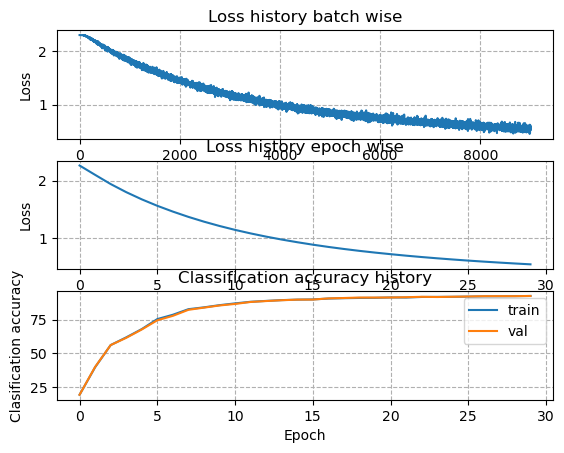

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [14]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256



# Grid Search
for lr in learning_rates:
    for hidden_size in num_hidden_nodes:
        # Initialize the neural network
        net = FirstNN(data_dimension, hidden_size, num_classes)
        
        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val,
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size,
                          learning_rate=lr,
                          verbose=False  # Set True if you want logs
                         )

        # Compute validation accuracy
        val_acc = 100*np.mean(net.predict(X_val, best_param=True) == Y_val)
        
        # Store results
        results[(hidden_size, lr)] = val_acc

        # Update best model if accuracy improves
        if val_acc > best_val:
            best_val = val_acc
            best_net = net  # Save the best trained model



# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

# Test on best model

In [4]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))